<a href="https://colab.research.google.com/github/si-ck/NeuralNetwork/blob/main/catVSdogsCNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle. json ~/.kaggle/

cp: cannot stat 'kaggle.': No such file or directory
cp: cannot stat 'json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:12<00:00, 148MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.1MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

IMPORT IMP LLIBRARIES

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
#generators
train_df=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [7]:
validation_df=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [8]:

#normalise
def process (image, label):
  image = tf. cast (image/255. ,tf.float32)
  return image, label
  train_df = train_ds. map (process)
  validation_df = validation_df.map(process)

CNN

In [15]:
model=Sequential()
#cnn layer1
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization()) #to reduce overfitting
#cnn layer2
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization()) #to reduce overfitting
#cnn layer3
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(BatchNormalization()) #to reduce overfitting

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))#to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))#to reduce overfitting
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 62, 62, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history= model.fit(train_df,epochs=10,validation_data=validation_df)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 85ms/step - accuracy: 0.5785 - loss: 3.2594 - val_accuracy: 0.6316 - val_loss: 0.6370
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 77ms/step - accuracy: 0.7046 - loss: 0.5672 - val_accuracy: 0.7442 - val_loss: 0.5175
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.7650 - loss: 0.4810 - val_accuracy: 0.7570 - val_loss: 0.4929
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 83ms/step - accuracy: 0.8048 - loss: 0.4121 - val_accuracy: 0.7636 - val_loss: 0.4796
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8437 - loss: 0.3515 - val_accuracy: 0.7550 - val_loss: 0.5473
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 92ms/step - accuracy: 0.8799 - loss: 0.2721 - val_accuracy: 0.7478 - val_loss: 0.6881
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.9204 - loss: 0.1949 - val_accuracy: 0.7640 - val_loss: 0.5895
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.9368 - loss: 0.1592 - 

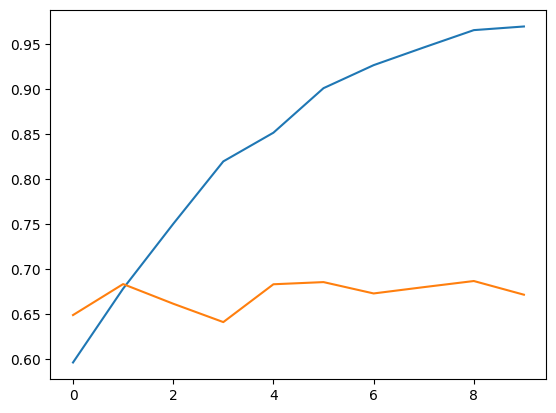

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

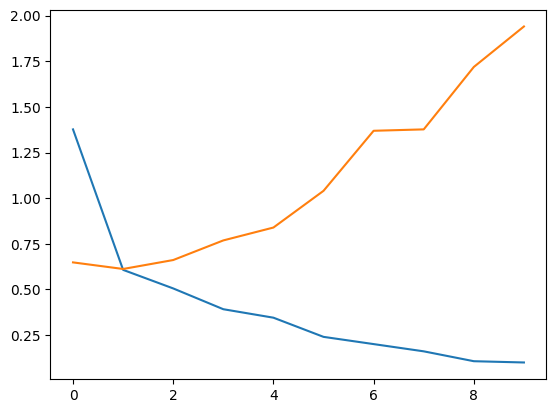

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

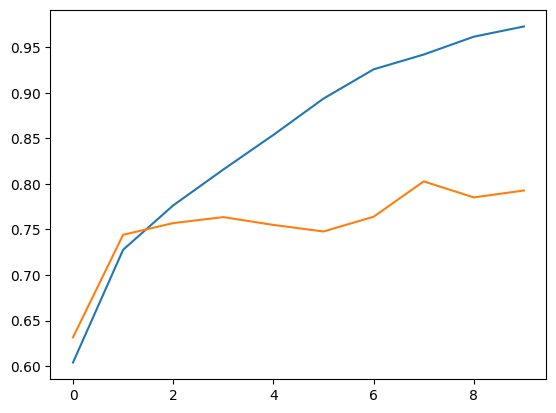

In [21]:
## as we can see overfitting is happening in the above case so we are adding droupout layer and also batch normalization


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


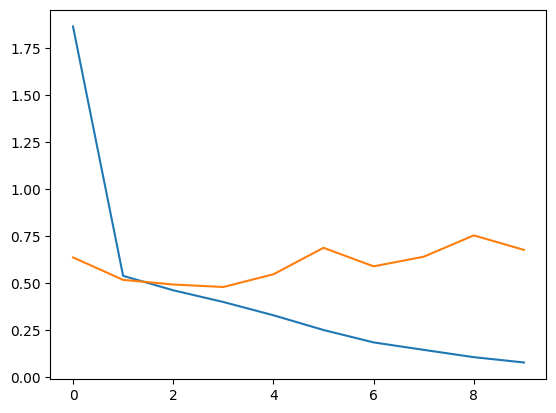

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Testing our model by providing new data


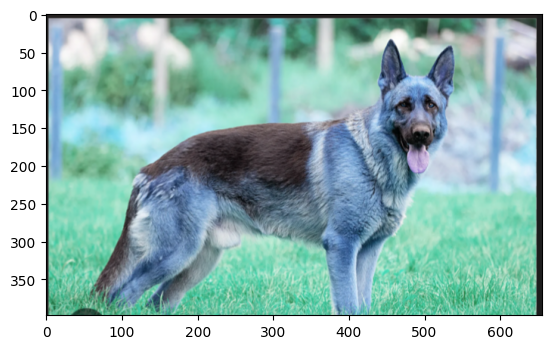

In [20]:
import cv2
test_img=cv2.imread('/content/dog.png')
plt.imshow(test_img)

In [23]:
test_img.shape

(398, 656, 3)

In [24]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.9917521]], dtype=float32)

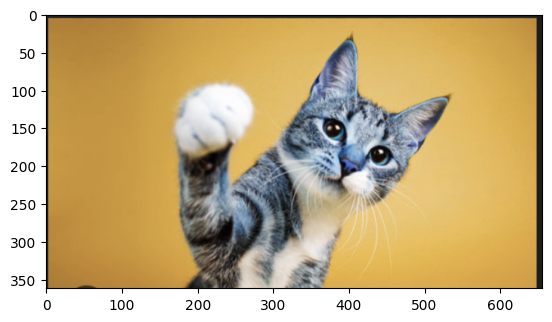

In [29]:
test_img2=cv2.imread('/content/cat.png')
plt.imshow(test_img2)

In [31]:
test_img2.shape

(362, 656, 3)

In [32]:
test_img2=cv2.resize(test_img2,(256,256))
test_input2=test_img2.reshape((1,256,256,3))

In [33]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.9279607]], dtype=float32)